In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import warnings
import networkx as nx
import matplotlib.colors as mcolors
# warnings.simplefilter(action='ignore', category=FutureWarning)
# pd.options.display.max_rows = None
# pd.options.display.max_columns = None
import glob as glob
import math

#### read in csv amyloid pos and negative for adni and a4 
- this code runs with the graph_env environment which uses pandas 1.5.2 instead of 2.1 that matteo made for mci_mri_graph env


### sort the data into quartiles based on centiloid value

In [3]:
merged_adni_at_amypos_bi_harm = pd.read_csv('../../data_paths_and_cleaning/data/intermediate_data/adni/merged_adni_at_amy_pos_bi_harm.csv')
merged_a4_at_amypos_bi_harm = pd.read_csv('../../data_paths_and_cleaning/data/intermediate_data/adni/merged_adni_at_amy_pos_bi_harm.csv')

In [91]:
merged_adni_at_amypos_bi_harm

,RID,SUPRAMARGINAL,AMYGDALA,MIDDLETEMPORAL,PARSOPERCULARIS,CAUDALANTERIORCINGULATE,INSULA,MEDIALORBITOFRONTAL,ENTORHINAL,PUTAMEN,...,POSTERIORCINGULATE,SUPERIORTEMPORAL,FUSIFORM,PARACENTRAL,CEREBELLUM_CORTEX,PARAHIPPOCAMPAL,BANKSSTS,POSTCENTRAL,HIPPOCAMPUS,SUPERIORFRONTAL
0,31,1.259,1.479,1.256,1.158,1.151,1.160,1.256,1.409,1.461,...,1.303,1.246,1.252,1.148,1.056,1.367,1.232,1.180,1.596,1.318
1,112,1.538,2.350,1.690,1.687,1.170,1.537,1.506,2.164,1.951,...,1.363,1.528,1.760,1.283,1.042,1.791,1.672,1.116,1.562,1.799
2,120,1.205,1.213,1.241,1.088,0.867,1.097,1.022,1.173,1.524,...,1.107,1.088,1.147,0.962,1.005,1.190,1.131,1.070,1.169,1.163
3,210,1.513,1.134,1.475,1.381,1.091,1.124,1.218,1.501,1.482,...,1.267,1.327,1.484,1.169,0.980,1.293,1.610,1.306,1.145,1.254
4,377,1.603,1.515,1.767,1.456,1.331,1.388,1.445,1.655,2.034,...,1.485,1.560,1.776,1.406,1.030,1.710,1.705,1.390,1.328,1.517
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,6580,1.363,1.599,1.407,1.244,1.101,1.140,1.252,1.565,1.669,...,1.135,1.224,1.347,1.239,0.978,1.173,1.298,1.212,1.296,1.283
394,6581,1.135,1.057,1.182,1.145,0.947,1.022,1.038,1.212,1.648,...,1.049,1.136,1.152,1.008,0.990,1.070,1.092,1.024,1.338,1.081
395,6586,1.062,1.040,1.176,1.108,0.961,1.013,1.071,1.175,1.876,...,0.969,1.071,1.100,0.823,1.018,0.941,1.126,0.845,0.971,1.053
396,7100,1.118,1.101,1.136,1.015,1.035,1.022,1.088,1.252,1.211,...,1.032,1.104,1.074,1.053,1.030,1.137,1.132,0.938,1.311,1.027


In [92]:
mean_a4 = merged_a4_at_amypos_bi_harm['CENTILOIDS'].mean()
mean_adni = merged_adni_at_amypos_bi_harm['CENTILOIDS'].mean()
print(mean_a4)
print(mean_adni)

66.58628418230562
78.41959798994975


#### do histogram of centiloid values across adni and a4 
- adni has higher centiloid values because a4 is anti-amyloid treatment in asymptomatic ad 
- makes sense that a4 has slightly lower centiloids than adni because it's selected by being asymptomatic 
- this probably means that the tau is also lower in a4 patients 


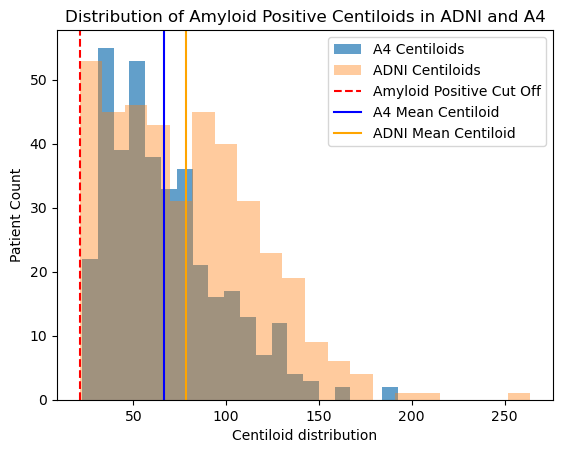

In [93]:
fig,ax = plt.subplots()
ax.hist(merged_a4_at_amypos_bi_harm['CENTILOIDS'],bins=20,label="A4 Centiloids",alpha=.7)
ax.hist(merged_adni_at_amypos_bi_harm['CENTILOIDS'],bins=20,label="ADNI Centiloids",alpha=.4)
ax.set_xlabel("Centiloid distribution")
ax.set_ylabel("Patient Count")
ax.axvline(x=21, color='red', linestyle='--', label='Amyloid Positive Cut Off')
ax.axvline(x=mean_a4, color='blue', linestyle='-', label='A4 Mean Centiloid')
ax.axvline(x=mean_adni, color='orange', linestyle='-', label='ADNI Mean Centiloid')
ax.legend()
plt.title("Distribution of Amyloid Positive Centiloids in ADNI and A4")
plt.show()


#### sort adni data into centiloid 
- throwing errors because the datatype is numpy.float64
-  think I fixed it 

In [94]:
print(merged_a4_at_amypos_bi_harm['CENTILOIDS'].dtype)

float64


In [95]:
# Calculate quartiles for each patient's 'CENTILOIDS' values
merged_adni_at_amypos_bi_harm['QUARTILE'] = pd.qcut(merged_adni_at_amypos_bi_harm['CENTILOIDS'], q=4, labels=False)

# Convert 'QUARTILE' column to integers and handle NaN values
merged_adni_at_amypos_bi_harm['QUARTILE'] = merged_adni_at_amypos_bi_harm['QUARTILE'].astype('Int64')

# Initialize empty DataFrames for each quartile
quartile_dfs = [pd.DataFrame(columns=merged_adni_at_amypos_bi_harm.columns) for _ in range(4)]

# Sort patients into quartile DataFrames
for index, row in merged_adni_at_amypos_bi_harm.iterrows():
    quartile_num = row['QUARTILE']
    quartile_dfs[quartile_num] = pd.concat([quartile_dfs[quartile_num], row.to_frame().T], ignore_index=True)

# Remove the 'QUARTILE' column from each quartile DataFrame
for i in range(4):
    quartile_dfs[i] = quartile_dfs[i].drop(columns=['QUARTILE'])

In [96]:
# # Calculate quartiles for each patient's 'CENTILOIDS' values
# merged_adni_at_amypos_bi_harm['QUARTILE'] = pd.qcut(merged_adni_at_amypos_bi_harm['CENTILOIDS'], q=4, labels=False)

# # # Convert 'QUARTILE' column to integers
# # merged_adni_at_amypos_bi_harm['QUARTILE'] = merged_adni_at_amypos_bi_harm['QUARTILE'].astype(int)

# # Initialize empty DataFrames for each quartile
# quartile_dfs = [pd.DataFrame(columns=merged_adni_at_amypos_bi_harm.columns) for _ in range(4)]

# # Sort patients into quartile DataFrames
# for index, row in merged_adni_at_amypos_bi_harm.iterrows():
#     quartile_num = row['QUARTILE']
#     quartile_dfs[quartile_num] = quartile_dfs[quartile_num].append(row, ignore_index=True)

# # Remove the 'QUARTILE' column from each quartile DataFrame
# for i in range(4):
#     quartile_dfs[i] = quartile_dfs[i].drop(columns=['QUARTILE'])




##### create separate data frames based on the new quartiles

In [97]:
#divide into quartiles based on centiloids column 
#the thing is 903 total patients but I want to divide them into quartiles 

cent_low = quartile_dfs[0]
cent_med_low = quartile_dfs[1]
cent_med_high = quartile_dfs[2]
cent_high = quartile_dfs[3]


In [98]:
merged_adni_at_amypos_bi_harm[['CENTILOIDS','QUARTILE']]

,CENTILOIDS,QUARTILE
0,97.0,2
1,89.0,2
2,32.0,0
3,54.0,1
4,85.0,2
...,...,...
393,142.0,3
394,28.0,0
395,40.0,0
396,50.0,1


#### Quartiles seem reasonably well aligned with AD pathology 
- centiloids are scaled such that 0 is no pathology and 100 is advanced pathology, so plotting thr quartiles seem to be reasonably well aligned based on the histrogram plotted 
- classes are also numerically balanced

<Axes: >

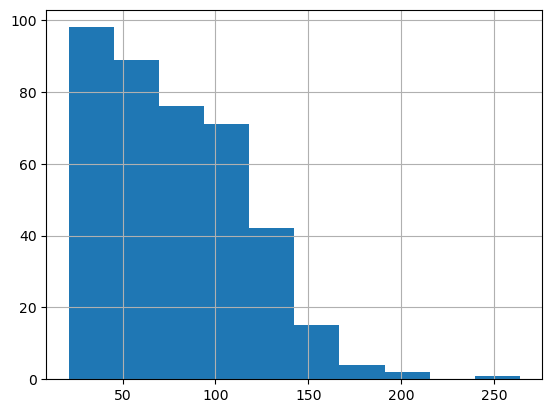

In [99]:
merged_adni_at_amypos_bi_harm['CENTILOIDS'].hist()

In [100]:
#classes are reasonably well balanced 
print(cent_low.shape)
print(cent_med_low.shape)
print(cent_med_high.shape)
print(cent_high.shape)


(104, 45)
(97, 45)
(98, 45)
(99, 45)


#### also check the centiloid ranges for each quartiles
##### it makes sense that the highest quartile would have the largest range because most of the data is cented 20-100 ish abased on the histogram 

In [101]:
low_range= [cent_low['CENTILOIDS'].min(),cent_low['CENTILOIDS'].max()]
med_low_range = [cent_med_low['CENTILOIDS'].min(),cent_med_low['CENTILOIDS'].max()]
med_high_range = [cent_med_high['CENTILOIDS'].min(),cent_med_high['CENTILOIDS'].max()]
high_range = [cent_high['CENTILOIDS'].min(),cent_high['CENTILOIDS'].max()]
print(f"centiloid range low amy pos quartile {low_range}")
print(f"centiloid range med low amy pos quartile {med_low_range}")
print(f"centiloid range med high amy pos quartile {med_high_range}")
print(f"centiloid range high amy pos quartile {high_range}")


centiloid range low amy pos quartile [21.0, 46.0]
centiloid range med low amy pos quartile [47.0, 75.0]
centiloid range med high amy pos quartile [76.0, 103.0]
centiloid range high amy pos quartile [104.0, 264.0]


##### save the adni centiloid quartiles csvs to use for graph construction

In [102]:
#save the quartile csvs 

cent_low.to_csv('../../data_paths_and_cleaning/data/final_cleaned_quartiles/adni_quartiles/adni_amy_tau_merged_cent_low_quartile.csv', index=False)
cent_med_low.to_csv('../../data_paths_and_cleaning/data/final_cleaned_quartiles/adni_quartiles/adni_amy_tau_merged_cent_med_low_quartile.csv', index=False)
cent_med_high.to_csv('../../data_paths_and_cleaning/data/final_cleaned_quartiles/adni_quartiles/adni_amy_tau_merged_cent_med_high_quartile.csv',index=False)
cent_high.to_csv('../../data_paths_and_cleaning/data/final_cleaned_quartiles/adni_quartiles/adni_amy_tau_merged_cent_high_quartile.csv',index=False)

- Only keep patients rows from most recent scan 


In [103]:
# #drop duplicate rows so that only the last visit row is still there 
# adni_amy_filtered = adni_amy.drop_duplicates(subset='RID',keep='last')
# #now it only has rows with the last visit 
# adni_amy_filtered = adni_amy.reset_index(drop=True)



# adni_amy['SCANDATE']= pd.to_datetime(adni_amy['SCANDATE'])
# #find most recent scan 
# most_recent_scan_date = adni_amy['SCANDATE'].max()
# #filter df to only include rows with most recent scan date 
# most_recent_scan = adni_amy[adni_amy['SCANDATE']==most_recent_scan_date]
# #select cols to keep 
# cols_to_keep = ['RID','SCANDATE','TRACER','CENTILOIDS']
# adni_amy_filtered = most_recent_scan[cols_to_keep]
# print(adni_amy_filtered)

* Task 1: 
* clean A4 data 
* I think that the A4_processed.csv has both amyloid and tau, but also includes patients with amyloid and no tau so just drop rows where the tau col is empty 
* A4_PETSUVR_PRV2_15_Aug2023 has id, visit code, and composite centiloid so use this for centiloid 

* TAUSUVR_15Aug2023 has the regional survs 


In [104]:
#fixed append error 
# Calculate quartiles for each patient's 'CENTILOIDS' values
merged_a4_at_amypos_bi_harm['quartile'] = pd.qcut(merged_a4_at_amypos_bi_harm['CENTILOIDS'], q=4, labels=False)

# Initialize empty DataFrames for each quartile
quartile_dfs = [pd.DataFrame(columns=merged_a4_at_amypos_bi_harm.columns) for _ in range(4)]

# Sort patients into quartile DataFrames
for index, row in merged_a4_at_amypos_bi_harm.iterrows():
    quartile_num = row['quartile']
    quartile_dfs[quartile_num] = pd.concat([quartile_dfs[quartile_num], row.to_frame().T], ignore_index=True)

# Remove the 'QUARTILE' column from each quartile DataFrame
for i in range(4):
    quartile_dfs[i] = quartile_dfs[i].drop(columns=['quartile'])


In [105]:
# # Calculate quartiles for each patient's 'CENTILOIDS' values
# merged_a4_at_amypos_bi_harm['quartile'] = pd.qcut(merged_a4_at_amypos_bi_harm['CENTILOIDS'], q=4, labels=False)

# # Initialize empty DataFrames for each quartile
# quartile_dfs = [pd.DataFrame(columns=merged_a4_at_amypos_bi_harm.columns) for _ in range(4)]

# # Sort patients into quartile DataFrames
# for index, row in merged_a4_at_amypos_bi_harm.iterrows():
#     quartile_num = row['quartile']
#     quartile_dfs[quartile_num] = quartile_dfs[quartile_num].append(row, ignore_index=True)

# # Remove the 'QUARTILE' column from each quartile DataFrame
# for i in range(4):
#     quartile_dfs[i] = quartile_dfs[i].drop(columns=['quartile'])


<Axes: >

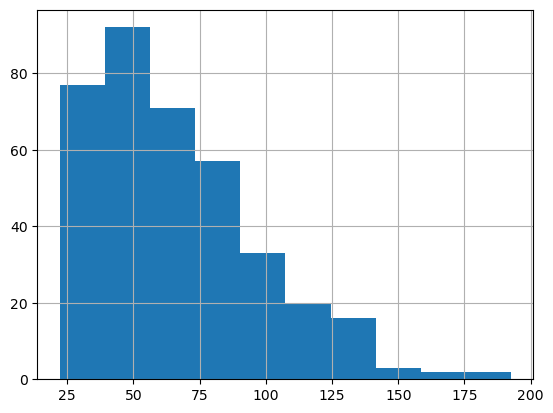

In [106]:
merged_a4_at_amypos_bi_harm['CENTILOIDS'].hist()

In [107]:
a4_cent_low = quartile_dfs[0]
a4_cent_med_low = quartile_dfs[1]
a4_cent_med_high = quartile_dfs[2]
a4_cent_high = quartile_dfs[3]

In [108]:
#classes are reasonably well balanced 
print(a4_cent_low.shape)
print(a4_cent_med_low.shape)
print(a4_cent_med_high.shape)
print(a4_cent_high.shape)

(101, 45)
(86, 45)
(94, 45)
(92, 45)


In [109]:
a4_low_range= [a4_cent_low['CENTILOIDS'].min(),a4_cent_low['CENTILOIDS'].max()]
a4_med_low_range = [a4_cent_med_low['CENTILOIDS'].min(),a4_cent_med_low['CENTILOIDS'].max()]
a4_med_high_range = [a4_cent_med_high['CENTILOIDS'].min(),a4_cent_med_high['CENTILOIDS'].max()]
a4_high_range = [a4_cent_high['CENTILOIDS'].min(),a4_cent_high['CENTILOIDS'].max()]
print(f"centiloid range low amy pos quartile {a4_low_range}")
print(f"centiloid range med low amy pos quartile {a4_med_low_range}")
print(f"centiloid range med high amy pos quartile {a4_med_high_range}")
print(f"centiloid range high amy pos quartile {a4_high_range}")

centiloid range low amy pos quartile [22.286, 42.424]
centiloid range med low amy pos quartile [44.255, 60.731]
centiloid range med high amy pos quartile [62.562, 82.699]
centiloid range high amy pos quartile [84.53, 192.541]


##### save a4 quartiles for graph construction 


In [110]:
#save the quartile csvs 
a4_cent_low.to_csv('../../data_paths_and_cleaning/data/final_cleaned_quartiles/a4_quartiles/a4_amy_tau_merged_cent_low_quartile.csv',index=False)
a4_cent_med_low.to_csv('../../data_paths_and_cleaning/data/final_cleaned_quartiles/a4_quartiles/a4_amy_tau_merged_cent_med_low_quartile.csv',index=False)
a4_cent_med_high.to_csv('../../data_paths_and_cleaning/data/final_cleaned_quartiles/a4_quartiles/a4_amy_tau_merged_cent_med_high_quartile.csv',index=False)
a4_cent_high.to_csv('../../data_paths_and_cleaning/data/final_cleaned_quartiles/a4_quartiles/a4_adni_amy_tau_merged_cent_high_quartile.csv',index=False)